In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
#load dataset
df1 = pd.read_csv('dataset.csv')
stock=df1
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.690000e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.310000e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550000e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.280000e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.880000e+14,NaN,816123,0.2741


In [4]:
stock['Date'].min()

'2007-11-27'

In [5]:
stock['Date'].max()

'2021-04-30'

In [6]:
#formating the date value
stock.Date = pd.to_datetime(stock.Date, format='%Y%m%d', errors='ignore')

In [7]:
#remove some columns
cols = ['Symbol','Series','Prev Close','Open','High', 'Low','Last','VWAP','Volume','Turnover','Trades','Deliverable Volume','%Deliverble']
stock.drop(cols, axis=1, inplace=True)
stock = stock.sort_values('Date')

In [8]:
stock = stock.groupby('Date')['Close'].sum().reset_index()

In [9]:
stock = stock.set_index('Date')
stock.index

Index(['2007-11-27', '2007-11-28', '2007-11-29', '2007-11-30', '2007-12-03',
       '2007-12-04', '2007-12-05', '2007-12-06', '2007-12-07', '2007-12-10',
       ...
       '2021-04-16', '2021-04-19', '2021-04-20', '2021-04-22', '2021-04-23',
       '2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29', '2021-04-30'],
      dtype='object', name='Date', length=3322)

In [10]:
stock.index = pd.to_datetime(stock.index)

monthly_mean = stock.Close.resample('M').mean()

In [11]:
#initial value for arima
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [12]:
# build the arimax model(SARIMAX)
l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2381.5662114810993
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2071.7700073097226
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2018.4834781555542
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1812.7185341905738
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2011.3925529025325
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1982.7737745719116
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1819.1341507936731
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1792.9230912744802
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2160.8283389980843
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1887.9115800735224
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1829.285326883172
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1650.7234376255624
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1848.9496984943987
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1806.2832257459322
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1674.6374833963255
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1639.7808960043512
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1775.2213449953194
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1586.2765600

In [13]:
#preparing the training
minimum=l_results_aic[0]
for i in l_results_aic[1:]:
    if i < minimum: 
        minimum = i
i=l_results_aic.index(minimum)

In [14]:
#Arima training
mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3988      0.056      7.157      0.000       0.290       0.508
ar.S.L12      -0.1666      0.063     -2.624      0.009      -0.291      -0.042
ma.S.L12      -0.7613      0.122     -6.242      0.000      -1.000      -0.522
sigma2      2563.2367    288.647      8.880      0.000    1997.498    3128.975


In [15]:
#prediction

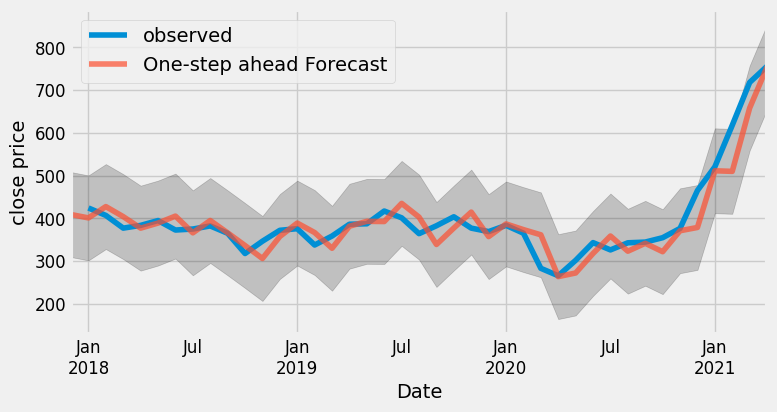

In [23]:
pred = results.get_prediction(start=pd.to_datetime('2017-12-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = monthly_mean['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(8, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('close price')
plt.legend()

plt.show()

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import math
import numpy as np

#spilt the dataset
train_data, test_data = stock[0:int(len(stock)*0.7)], stock[int(len(stock)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
print(test_data.shape)
fc = results.forecast(997, alpha=0.0005)  # 95% conf
print(fc.shape)
# report performance
mse = np.sqrt(math.sqrt(mean_squared_error(test_data, fc)/len(training_data)))
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)/len(test_data)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))/len(test_data)
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))/len(test_data)
print('MAPE: '+str(mape))

(997,)
(997,)
MSE: 9.488719967602579
MAE: 3.8552648142348955
RMSE: 4.354432673330494
MAPE: 0.01004531872221678


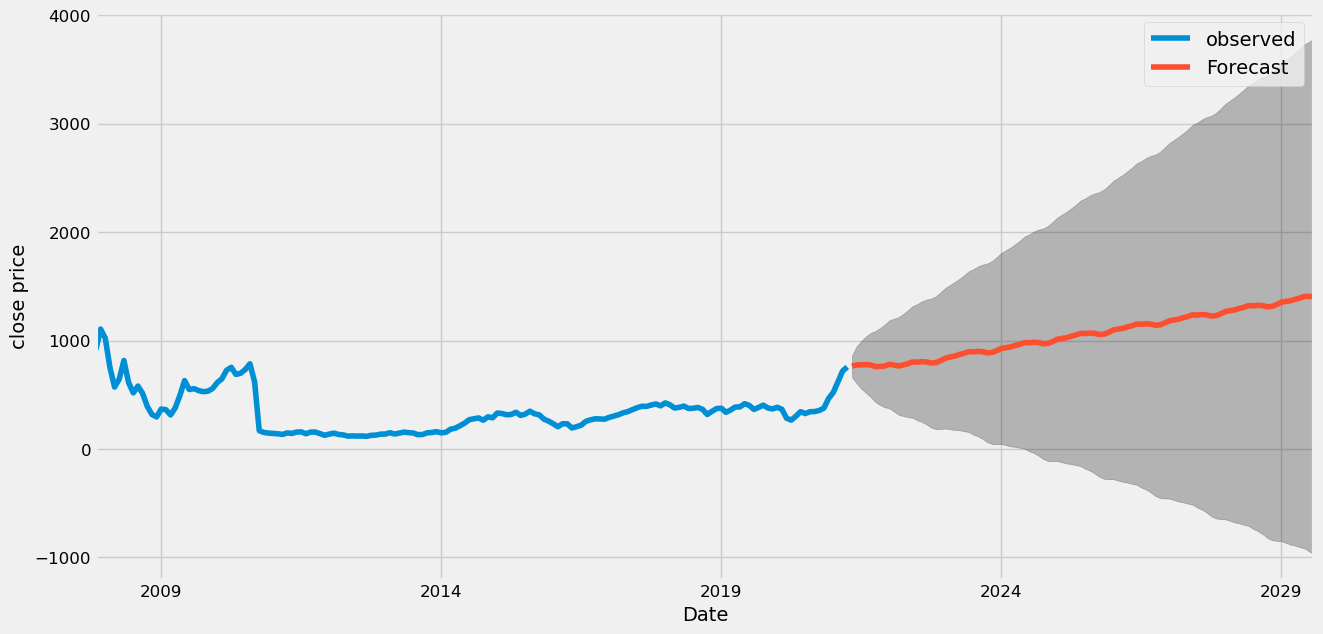

In [20]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = monthly_mean.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('close price')

plt.legend()
plt.show()